# AIで美味しいワインを判定する

今回は白ワインを選択
→ winequality-white.csv
※区切り文字が";"なのに注意

### データ内容
11種類のワインの成分データに続いて, 12番目がワイン専門家によるワインの品質データとなっている.

ワイン専門家による品質評価は3回以上の評価を行い, その中央値を採用したもの.  
0が最も悪く, 数値が上がるごとに評価が高くなり10が最良.

#### データ構成

1 fixed acidity : 酸性度  
2 volatile acidity : 揮発性酸度  
3 citric acid : クエン酸  
4 residual sugar : 残留糖  
5 chlorides : 塩化物  
6 free sulfur dioxide : 遊離二酸化硫黄  
7 total sulfur dioxide : 総二酸化硫黄  
8 density : 密度  
9 pH : pH  
10 sulphates : 硫酸塩  
11 alcohol : アルコール  
12 quality : 品質(0:悪い - 10:良い)

## 判定内容

### アルゴリズム
#### ランダムフォレスト
決定木とアンサンブル学習を組み合わせたアルゴリズム.   
機械学習の「分類」や「回帰」の用途で用いられることが多い.  
特徴としては決定木を単体で使用するよりも高い精度を出せる.

1. 元データからn個のブートストラップデータ集合を構成
2. データ集合からn個の決定木を生成
3. p個の特徴量からm個の特徴量をランダムに選択
4. 分類の場合はn個の決定木の多数決を, 回帰の場合はn個の決定木の平均を最終的な予測とする

##### 決定木
「予測」や「判別」, 「分類」を目的にする際に用いられる手法.  
Yes/Noの二者択一を階層構造的に繋げ, 答えていくことで最終的な正解に辿り着ける仕組み.

##### アンサンブル学習
より良い予測結果を得るために複数の学習アルゴリズムを組み合わせる技術.  
複数の単一モデルを用いて強力なモデルを構築する.
「分類」の場合は複数の学習器の多数決で, 「回帰」の場合は複数の学習器の平均を取るのが一般的.

###### バギング(Bagging)
ブートストラップ(Bootstarap Aggregating)を用いて複数のモデルを並列的に学習させる方法.  
(ブートストラップ - 元データから一部のデータを復元抽出してサンプリング)  
ランダムフォレストはバギングを使用.

###### ブースティング
複数のモデルを使い, 学習を直列的に進めていく手法.



In [3]:
# データの確認
import pandas as pd

# データの読み込み
df = pd.read_csv("csv/winequality-white.csv", sep = ";", encoding="utf-8")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [6]:
# 品質判定プログラム

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# データの読み込み
wine = pd.read_csv("csv/winequality-white.csv", sep=";", encoding="utf-8")

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# 学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.86      0.20      0.32        30
           5       0.73      0.66      0.69       289
           6       0.65      0.80      0.72       447
           7       0.67      0.59      0.63       163
           8       1.00      0.43      0.60        44
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.56      0.38      0.42       980
weighted avg       0.69      0.68      0.67       980

正解率= 0.6816326530612244


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 関数

#### pd.drop(index="行名or列名", axis=0, inplace=False)  
指定した行を削除. axis=0 → 行を削除, axis=1 → 列を削除.  
複数行の場合はリストを使用

#### sklearn.metrics.classification_report(y_true, y_pred, label=None, target_names=None, sample_weight=None, digit=2, output_dict=False, zero_division='warn')
主要な分類賞を示すテキストレポートを作成.

### 内容について
68%程度の正解率ではあまり精度が高いとは言えない  
→ 精度向上を目指す

classification_report()において, "UndefinedMetricWarning"が出力されている  
→ 全てのラベルにデータが分類されていない
→ データを確認すると11段階のワインがそれぞれ同数あるわけではないことがわかる

実行するたび値が異なる原因 - 学習用データとテスト用データをランダムに分割しているため

precision - 精度  
recall - 再現率  
f1-score - 精度と再現率の調和平均
support -正解ラベルのデータ数

※調和平均 -　逆数の平均の逆数. 生産性の平均で使用される. どの平均を使うかは何を固定して考えているかが重要

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


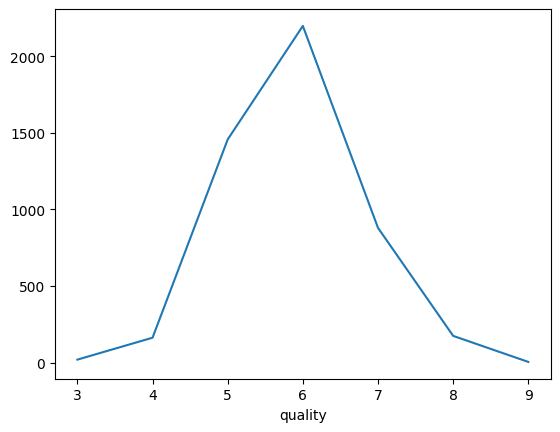

In [7]:
# 各品質のデータがいくつずつあるか調べる
import matplotlib.pyplot as plt 
import pandas as pd 

# データの読み込み
wine = pd.read_csv("csv/winequality-white.csv", sep=";", encoding="utf-8")

# 品質ごとにグループ分け
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

# 数えたデータをグラフ化
count_data.plot()
plt.savefig("images/wine-count-plt.png")
plt.show()

### 関数
#### pandas.DataFrame.groupby(by=None, asis=_NoDefault.no_default, level=None, as_index=True, sort=True, group_keys=True, observed = _Nodefault.no_default, dropna=True)
オブジェクトの分割, 関数の適応, 結果の結合など, 大量データのグループ化を行う.  
今回は'quality'ごとにグループを分け, groupbyオブジェクトのそれぞれのデータ数を数えている

### データ内容
ワンデータの品質は5~7が大半を占める.  
0, 1, 2, 10の品質のものは存在しない.

→ このようなデータの分布数に差のあるデータ : 不均衡データ

→ 11段階のデータを
1. 4以前
2. 5 - 7
3. 8以上  

にラベル分けする

In [9]:
# ラベル分け
newlist = []

for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v<= 7:
        newlist += [1]
    else:
        newlist += [2]

y = newlist

In [10]:
# 最終的なプログラム

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# データの読み込み
wine = pd.read_csv("csv/winequality-white.csv", sep=";", encoding="utf-8")

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# yのラベルを再定義
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]

y = newlist
# 学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.32      0.44        31
           1       0.95      0.99      0.97       913
           2       0.92      0.33      0.49        36

    accuracy                           0.95       980
   macro avg       0.86      0.55      0.64       980
weighted avg       0.94      0.95      0.94       980

正解率= 0.9489795918367347


正解率の向上に成功  
どんなデータをどのように分類しようとしているのかを調べ, データを変形・整形してみることが精度向上を助ける